### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

### 2. Dataset

In [2]:
(ds_train, ds_validation), ds_info = tfds.load(
    'imagenette',
    split=['train','validation'],
    data_dir=parameter.datadir,
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

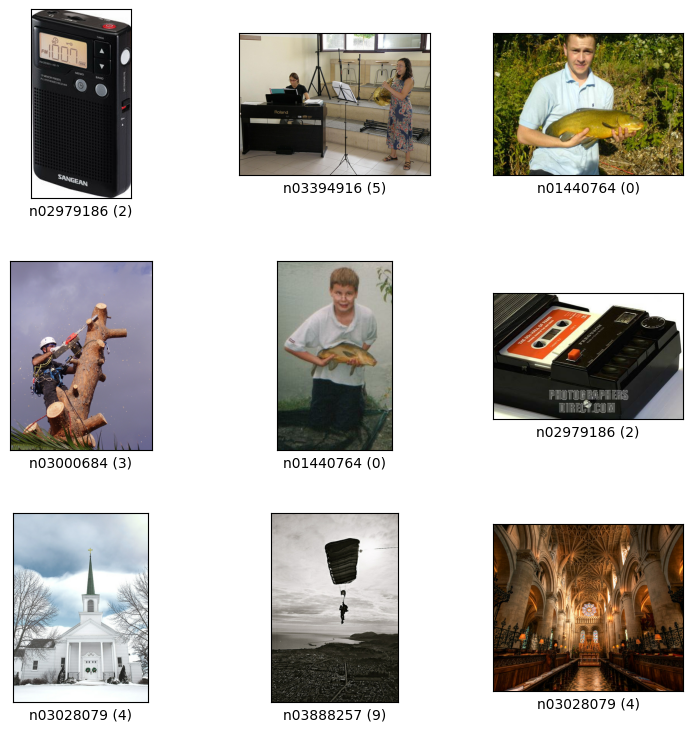

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
def normalize_img(image, label):
    image = tf.image.resize(image, (parameter.IMAGE_SIZE, parameter.IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(parameter.BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(parameter.BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)

### 3. Training

In [5]:
import Models.CNN_Model

model = Models.CNN_Model.Model()



Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                      

In [6]:
# [layer1, layer2, layer3] = model.layers
# W1, b1 = layer1.get_weights()
# W2, b2 = layer2.get_weights()
# W3, b3 = layer3.get_weights()
# print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
# print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
# print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

In [7]:
history = model.fit(
    ds_train,
    epochs=10,
    verbose=2,
)

148/148 - 268s - loss: 1.1318 - accuracy: 0.6323 - 268s/epoch - 2s/step
Epoch 8/10


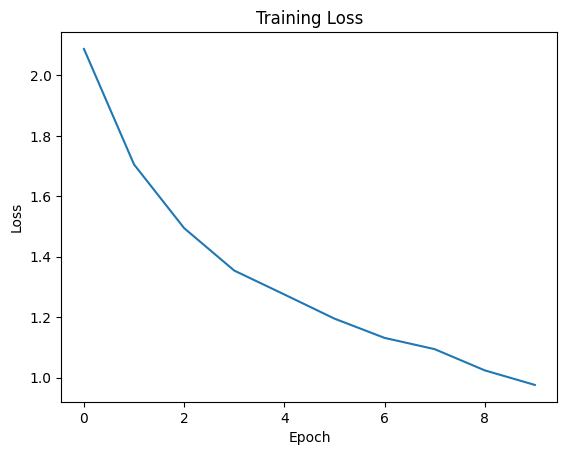

In [ ]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 4. Test

In [ ]:
model.evaluate(ds_validation)

AttributeError: 'Model' object has no attribute 'evaluate'